In [4]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

import ROOT as r
import rootnotes
import numpy as np
import matplotlib.pyplot as plt
from rootpy.io import root_open
import rootpy.plotting.root2matplotlib as rplt
from rootpy.plotting.style import set_style
import math

canvas = rootnotes.default_canvas()

# Use the Bayesian Methods for Hackers design
plt.style.use('bmh')

In [2]:
# Path to ROOT file that will be used to obtain the Trident invariant mass histogram
rad_file_path = "/home/omoreno/work/hps/plots/engrun2015/pass3/1pt05_mc/tridents/rad/trident_analysis.root"
bh_file_path = "/home/omoreno/work/hps/plots/engrun2015/pass3/1pt05_mc/tridents/bh/trident_analysis.root"

# Open the ROOT file containing the histograms of interest
rad_root_file = root_open(rad_file_path)
bh_root_file  = root_open(bh_file_path);

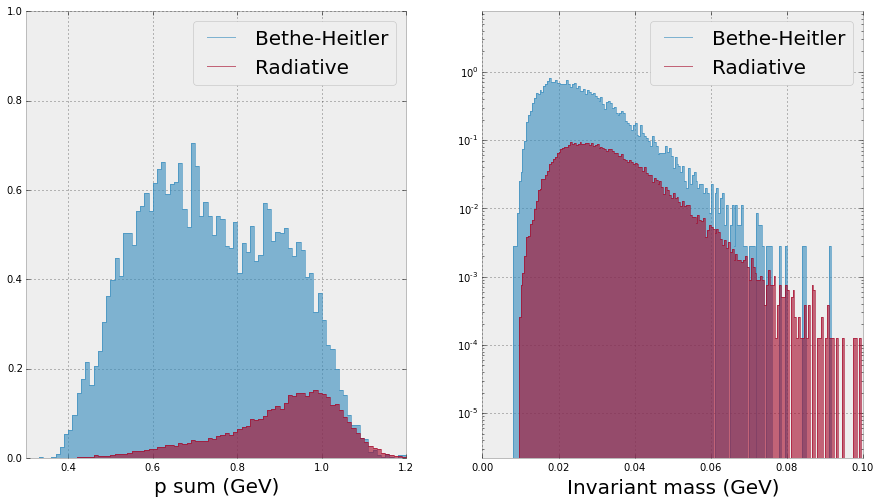

In [5]:
bkg_names = ['Radiative', 'Bethe-Heitler']

bh_p_sum = bh_root_file.Get('p sum - matched, e+e-')
bh_p_sum.Scale(29.6/bh_p_sum.Integral())
bh_p_sum.linecolor = '#348ABD'
bh_p_sum.fillstyle = 'solid'
bh_p_sum.fillcolor = '#348ABD'

rad_p_sum = rad_root_file.Get('p sum - matched, e+e-')
rad_p_sum.Scale(4.29/rad_p_sum.Integral())
rad_p_sum.linecolor = '#A60628'
rad_p_sum.fillstyle = 'solid'
rad_p_sum.fillcolor = '#A60628'

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

rplt.hist(bh_p_sum, axes=ax0, label=bkg_names[1], alpha=.6)
rplt.hist(rad_p_sum, axes=ax0, label=bkg_names[0], alpha=.6)
ax0.set_xlabel("p sum (GeV)", fontsize=20)
ax0.set_ylabel("", fontsize=20)
ax0.set_ylim(0, 1)
ax0.set_xlim(0.3, 1.2)
ax0.legend(fontsize=20)

bh_mass = bh_root_file.Get('invariant mass')
bh_mass.Scale(29.6/bh_mass.Integral())
bh_mass.linecolor = '#348ABD'
bh_mass.fillstyle = 'solid'
bh_mass.fillcolor = '#348ABD'

rad_mass = rad_root_file.Get('invariant mass')
rad_mass.Scale(4.29/rad_mass.Integral())
rad_mass.linecolor = '#A60628'
rad_mass.fillstyle = 'solid'
rad_mass.fillcolor = '#A60628'

ax1.set_yscale('log')
rplt.hist(bh_mass, axes=ax1, label=bkg_names[1], alpha=.6)
rplt.hist(rad_mass, axes=ax1, label=bkg_names[0], alpha=.6)
ax1.set_xlabel("Invariant mass (GeV)", fontsize=20)
ax1.set_ylabel("", fontsize=20)
ax1.legend(fontsize=20);


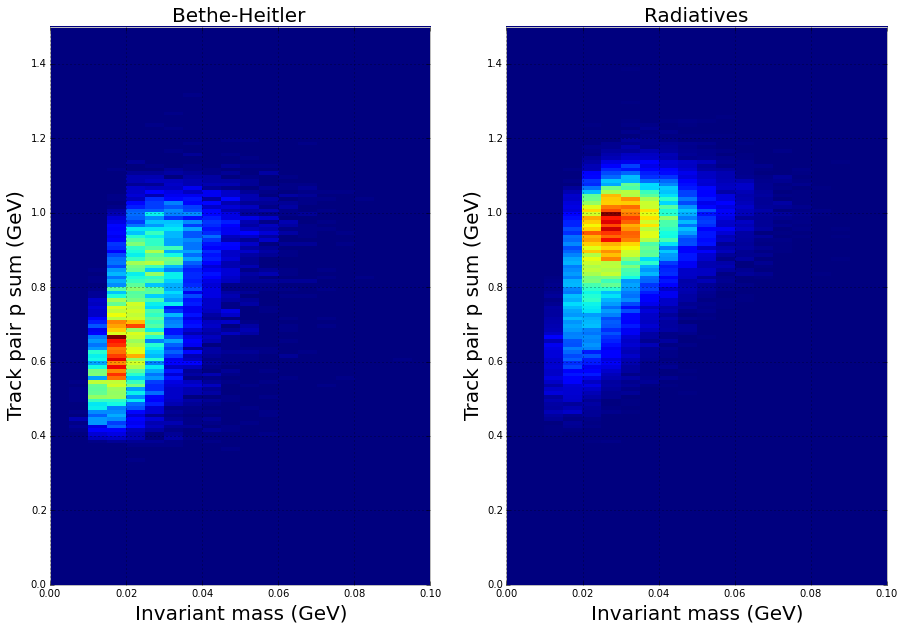

In [6]:
bh_im_v_p_sum = bh_root_file.Get('invariant mass v track p sum')
bh_im_v_p_sum.RebinX(10)

rad_im_v_p_sum = rad_root_file.Get('invariant mass v track p sum')
rad_im_v_p_sum.RebinX(10)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

ax0.set_title("Bethe-Heitler", fontsize=20)
rplt.hist2d(bh_im_v_p_sum, axes=ax0)
ax0.set_xlabel("Invariant mass (GeV)", fontsize=20)
ax0.set_ylabel("Track pair p sum (GeV)", fontsize=20)

ax1.set_title("Radiatives", fontsize=20)
rplt.hist2d(rad_im_v_p_sum, axes=ax1)
ax1.set_xlabel("Invariant mass (GeV)", fontsize=20)
ax1.set_ylabel("Track pair p sum (GeV)", fontsize=20);

## Track pair momentum sum for different mass bins

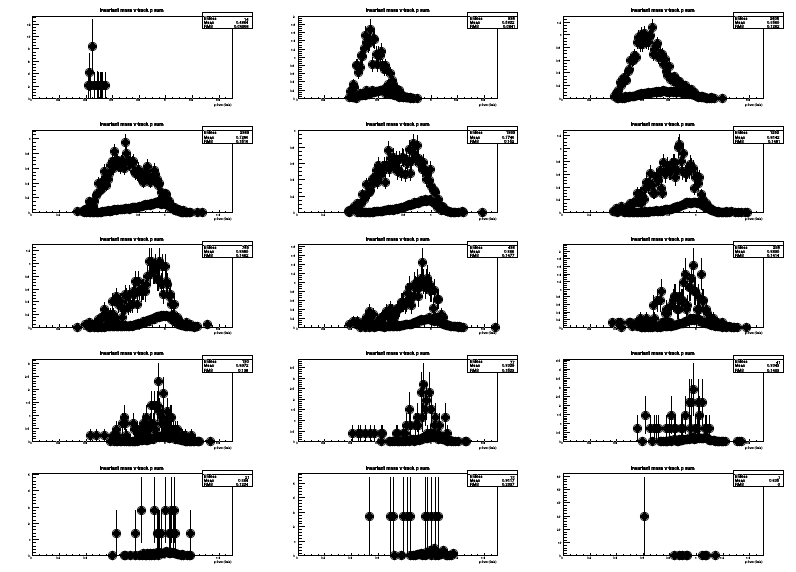

In [7]:
# Change pyroot so it plays nice with projections?

canvas.Clear()
canvas.Divide(3, 5)

rad_projections = []
bh_projections = []
index = 0
mass_bins = []
for bin_number in range(1, rad_im_v_p_sum.GetXaxis().GetNbins()) :
    
    if rad_im_v_p_sum.ProjectionY("", bin_number, bin_number).GetEntries() == 0 : continue
        
    if bh_im_v_p_sum.ProjectionY("", bin_number, bin_number).GetEntries() == 0 : continue
    
    mass_bins.append(rad_im_v_p_sum.GetXaxis().GetBinCenter(bin_number))
    
    rad_projections.append(r.TH1D(rad_im_v_p_sum.ProjectionY("", bin_number, bin_number)))
    rad_projections[index].Scale(4.29/rad_projections[index].Integral())
    bh_projections.append(r.TH1D(bh_im_v_p_sum.ProjectionY("", bin_number, bin_number)))
    bh_projections[index].Scale(29.6/bh_projections[index].Integral())
    canvas.cd(index + 1)
    bh_projections[index].Draw()
    rad_projections[index].Draw("same")
    
    index += 1
    
canvas

## S/sqrt(S + B)

S = radiatives; 
B = Bethe-Heitlers

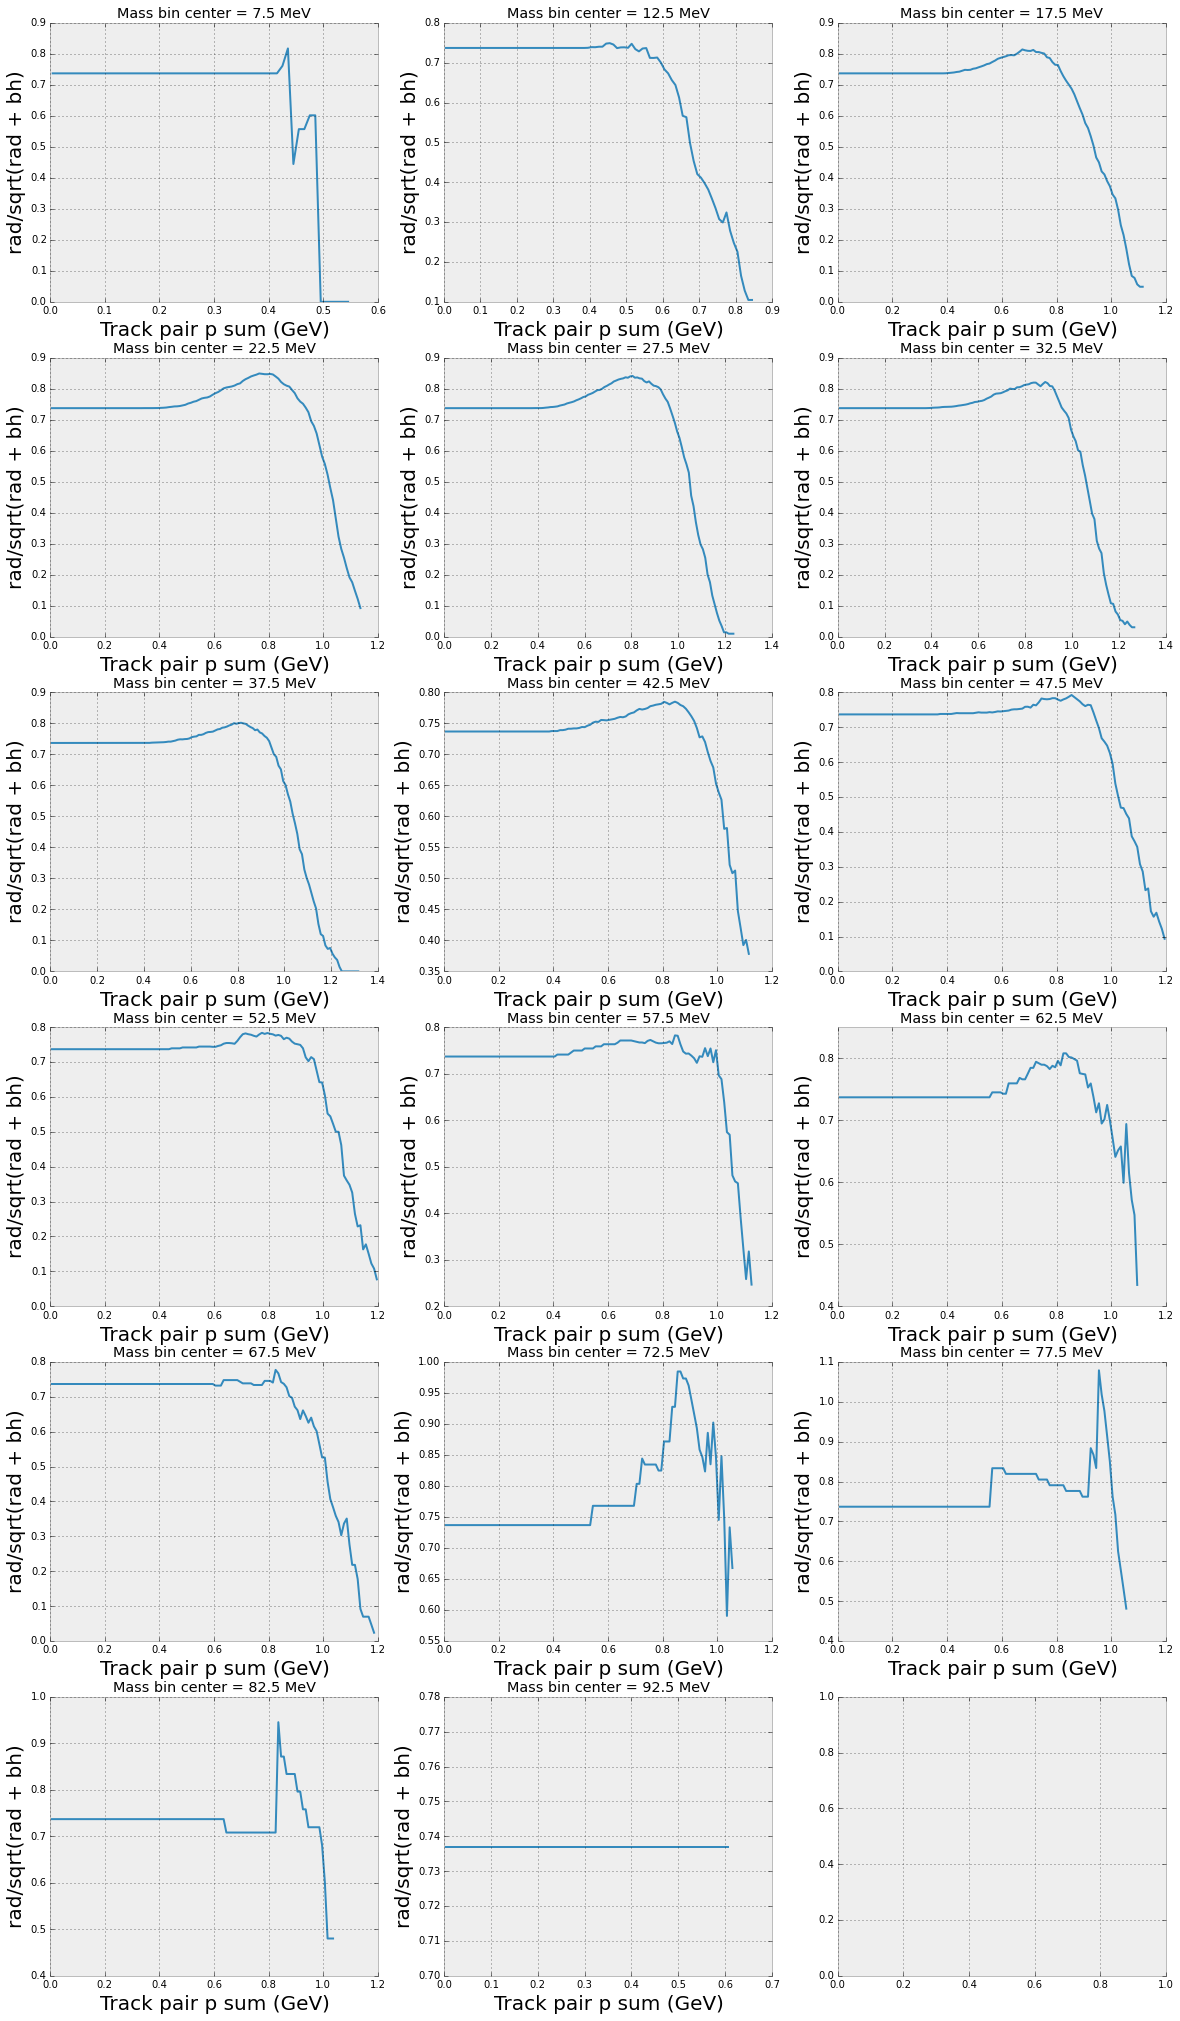

In [16]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 35))
ax = axes.flatten()

hist_index = 0
p_sum_cut = []

for bh_projection in bh_projections : 
    
    s_sqrtb = []
    s_to_b = []
    s_eff = []
    b_eff = []
    bh_count = []
    rad_count = []
    x_vals = []
    
    for bin_number in range(1, bh_projection.GetXaxis().GetNbins()) :
    
        bin_center = bh_projection.GetXaxis().GetBinCenter(bin_number)
        bin_cont = bh_projection.Integral(bin_number, bh_projection.GetXaxis().GetNbins())
        
        if bin_cont == 0. : continue
            
        bh_count.append(bin_cont)
        x_vals.append(bin_center)
        
        bin_center = rad_projections[hist_index].GetXaxis().GetBinCenter(bin_number)
        bin_cont = rad_projections[hist_index].Integral(bin_number, rad_projections[hist_index].GetXaxis().GetNbins())
        
        rad_count.append(bin_cont)
    
    for index in xrange(0, len(bh_count)) :
    
        s_sqrtb.append(rad_count[index]/math.sqrt(bh_count[index] + rad_count[index]))
        s_to_b.append(rad_count[index]/(rad_count[index] + bh_count[index]))
        #s_eff.append(rad_count[index]/histograms["rad cluster pair energy sum"].Integral())
        #b_eff.append(bh_count[index]/histograms["bh cluster pair energy sum"].Integral())
    
    ax[hist_index].set_title("Mass bin center = " + str(mass_bins[hist_index]*1000) + " MeV")
    ax[hist_index].plot(x_vals, s_sqrtb)
    ax[hist_index].set_xlabel("Track pair p sum (GeV)", fontsize=20)
    ax[hist_index].set_ylabel("rad/sqrt(rad + bh)", fontsize=20)
    p_sum_cut.append(x_vals[np.argmax(np.array(s_sqrtb))])
    hist_index += 1


## Optimized p sum cut values as a function of invariant mass

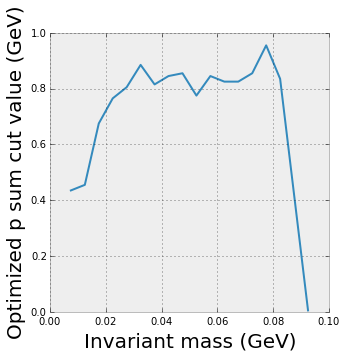

In [18]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax0.plot(mass_bins, p_sum_cut)
ax0.set_xlabel("Invariant mass (GeV)", fontsize=20)
ax0.set_ylabel("Optimized p sum cut value (GeV)", fontsize=20);